In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

In [3]:
# read the dataset
df = pd.read_csv('diabetes.csv')
cols = df.columns

In [4]:
# show the data
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


# **Observations**

It is clear from the above pairplot that **Glucose level plays the most important role than any other feature.**

In [20]:
# Independant and Dependant features
X = df.drop('Outcome',axis=1)
y = df['Outcome']


In [24]:
X.head().style.background_gradient(cmap='Set2')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.600000,0.627000,50
1,85,66,29,0,26.600000,0.351000,31
2,183,64,0,0,23.300000,0.672000,32
3,89,66,23,94,28.100000,0.167000,21
4,137,40,35,168,43.100000,2.288000,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# **Modelling**

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=44)

# Decision Trees

In [9]:
tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)

In [10]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [11]:
tree_pred = tree_classifier.predict(X_test)

In [12]:
tree_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [13]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

In [14]:
accuracy_score(y_test,tree_pred)

0.78125

In [15]:
tree_conf_mat = confusion_matrix(y_test,tree_pred)
tree_conf_mat

array([[102,  13],
       [ 29,  48]])

# Decision Tree Evaluation

***Visualizing the Decision Tree***

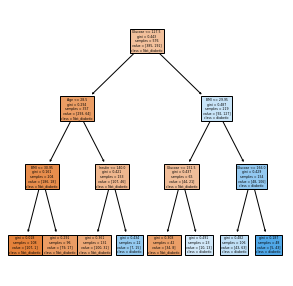

In [18]:
class_names = ['Not_diabetic', 'diabetic']
fig = plt.figure(figsize=(5,5))
_ = plot_tree(tree_classifier, 
                   feature_names=cols[:-1],  
                   class_names=class_names,
                   filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_score

cv_results = cross_validate(tree_classifier,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
cv_results['test_accuracy'].mean()



0.7291740938799762

In [ ]:
cv_results['test_f1'].mean()

0.5232927110238034

In [ ]:
cv_results['test_roc_auc'].mean()

0.7775234102026556

In [ ]:
random_user = X.sample(1)

In [ ]:
tree_classifier.predict(random_user)

array([0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
def tree_model(X,y):
    X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
    tree_model=DecisionTreeClassifier().fit(X_train,y_train)
    y_pred=tree_model.predict(X_test)
    print('Test Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
    print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
    print("Cross Val Score  : ",cross_val_score(tree_model,X_test,y_test,cv=10).mean())
    print("Classification Report:\n",classification_report(y_test,y_pred))
    plot_confusion_matrix(tree_model, X_test, y_test)

Test Confusion Matrix:
 [[110  41]
 [ 24  56]]
Accuracy Score  :  0.7186147186147186
Cross Val Score  :  0.6889492753623188
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       151
           1       0.58      0.70      0.63        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.72      0.72       231



C:\Users\Foram Solanki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


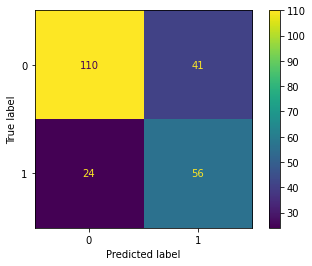

In [ ]:
tree_model(X,y)